```shell
!pip install langchain_experimental
```

In [12]:
from langchain_core.output_parsers import StrOutputParser
from langchain.agents import Tool
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL
from langchain.chat_models import ChatZhipuAI


In [4]:
ZHIPUAI_API_KEY = "7915b2531ef0ca993089bf8af6925d8a.NFPlI2RahsKuY0K7"

In [5]:
llm = ChatZhipuAI(model_name="glm-4", api_key=ZHIPUAI_API_KEY)

In [6]:
python_repl = PythonREPL()

Python REPL can execute arbitrary code. Use with caution.


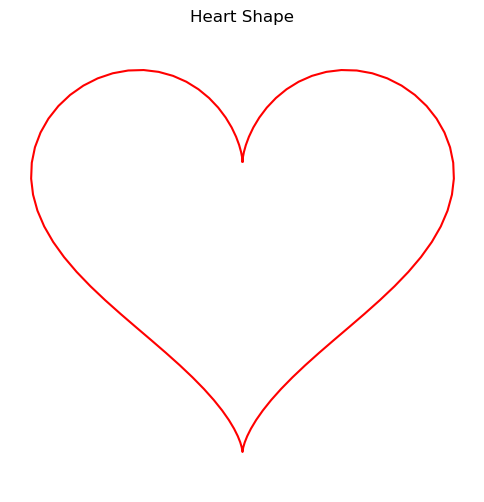

''

In [7]:
program = '''
# Executing the provided code to plot a heart shape

import matplotlib.pyplot as plt
import numpy as np

# Setting the parameters for the heart shape
t = np.linspace(0, 2 * np.pi, 100)
x = 16 * np.sin(t)**3
y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)

# Plotting the heart shape
plt.figure(figsize=(6,6))
plt.plot(x, y, color='red')
plt.title('Heart Shape')
plt.axis('equal')
plt.axis('off')
plt.show()
'''
python_repl.run(program)

In [8]:
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [9]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
print("hello!")
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatZhipuAI(model_name="glm-4", api_key=ZHIPUAI_API_KEY)
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

chain = model | StrOutputParser() | _sanitize_output | PythonREPL().run

result = model.invoke("whats 2 plus 2")

print(result)

content='2 plus 2 equals 4.' response_metadata={'finish_reason': 'stop', 'index': 0}


In [13]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import (
    ChatPromptTemplate,
)
from langchain_experimental.utilities import PythonREPL

template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatZhipuAI(model_name="glm-4", api_key=ZHIPUAI_API_KEY)

def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

result = chain.invoke({"input": "whats 2 plus 2"})

print(result)


4

